In [1]:
import lightgbm
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_eye_all = pd.read_csv("VREED_Dataset/04 Eye Tracking Data/02 Eye Tracking Data (Features Extracted)/EyeTracking_FeaturesExtracted.csv")
df_eye_all.head()

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,0.605556,1208.440367,1013.049251,2.080900,6127,1640,0.605556,438.064220,517.053212,...,-0.047816,179.719495,0.419874,25.214209,3.156580,220.069746,-0.182289,8.975206,0.107803,45.070474
1,0,0.459184,1796.311111,1880.259542,2.346293,9773,556,0.448980,392.000000,426.838023,...,-0.161061,179.563907,-4.596920,74.737290,-8.745373,144.173941,0.660248,10.523471,3.971437,81.150671
2,0,0.480000,1617.694444,1895.391401,1.633123,7573,671,0.466667,481.314286,528.473650,...,-0.214484,179.789091,-1.217540,17.351371,-2.922202,35.323715,-1.158868,14.659309,-5.198588,26.595861
3,3,0.454545,1858.763636,2711.244828,3.296111,14840,1804,0.446281,349.240741,427.406260,...,0.083588,179.846777,-0.908321,25.611097,-3.302714,122.294053,0.094660,3.775847,1.529565,29.637883
4,1,0.527778,1582.126316,1520.578818,1.862892,7526,1315,0.522222,311.531915,355.951480,...,0.219166,179.868585,-2.472084,17.046195,-2.911459,55.629425,-0.538492,5.075856,-2.305319,17.997401


In [3]:
#Fill empty cells with mean of their respective column values
mean_Mean_Blink_Duration = df_eye_all["Mean_Blink_Duration"].mean()
df_eye_all["Mean_Blink_Duration"].fillna(mean_Mean_Blink_Duration, inplace = True)

mean_SD_Blink_Duration = df_eye_all["SD_Blink_Duration"].mean()
df_eye_all["SD_Blink_Duration"].fillna(mean_SD_Blink_Duration, inplace = True)

mean_Skew_Blink_Duration = df_eye_all["Skew_Blink_Duration"].mean()
df_eye_all["Skew_Blink_Duration"].fillna(mean_Skew_Blink_Duration, inplace = True)

mean_Max_Blink_Duration = df_eye_all["Max_Blink_Duration"].mean()
df_eye_all["Max_Blink_Duration"].fillna(mean_Max_Blink_Duration, inplace = True)

In [4]:
#Normalize the data
scaler = preprocessing.RobustScaler()
df_eye_drop = df_eye_all.drop(['Quad_Cat'], axis=1)
names = df_eye_drop.columns
fit = scaler.fit_transform(df_eye_drop)
scaled_df = pd.DataFrame(fit, columns=names)

In [5]:
scaled_df.head()

,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,Skew_Saccade_Duration,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1.158568,-0.728283,-0.641530,-0.000383,-0.563783,-0.053123,1.153422,0.432086,0.566543,0.184784,...,-0.639956,-0.452798,0.252308,0.524017,1.060607,1.595281,-0.551330,0.572009,0.016747,0.536135
1,0.290176,-0.230420,-0.172042,0.250877,-0.150357,-0.405329,0.251295,0.194501,0.133285,-0.874991,...,-1.631158,-0.994589,-3.880810,4.832145,-2.998562,0.615490,2.480836,0.861629,1.298258,1.796549
2,0.413675,-0.381689,-0.163850,-0.424315,-0.399819,-0.367964,0.353201,0.655158,0.621389,-0.131466,...,-2.098753,-0.210447,-1.096686,-0.159989,-1.012565,-0.789731,-4.065891,1.635282,-1.743306,-0.109252
3,0.262659,-0.177530,0.277835,1.150116,0.424198,0.000162,0.235747,-0.026039,0.136014,0.307141,...,0.510189,-0.009573,-0.841935,0.558544,-1.142339,0.333028,0.445371,-0.400588,0.488325,-0.002983
4,0.697130,-0.411811,-0.366765,-0.206782,-0.405148,-0.158720,0.673289,-0.220530,-0.207146,0.392964,...,1.696872,0.066368,-2.130250,-0.186537,-1.008902,-0.527591,-1.833250,-0.157407,-0.783651,-0.409628


In [6]:
df_eye = pd.concat([df_eye_all['Quad_Cat'],scaled_df], axis = 1)
df_eye

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,1.158568,-0.728283,-0.641530,-0.000383,-0.563783,-0.053123,1.153422,0.432086,0.566543,...,-0.639956,-0.452798,0.252308,0.524017,1.060607,1.595281,-0.551330,0.572009,0.016747,0.536135
1,0,0.290176,-0.230420,-0.172042,0.250877,-0.150357,-0.405329,0.251295,0.194501,0.133285,...,-1.631158,-0.994589,-3.880810,4.832145,-2.998562,0.615490,2.480836,0.861629,1.298258,1.796549
2,0,0.413675,-0.381689,-0.163850,-0.424315,-0.399819,-0.367964,0.353201,0.655158,0.621389,...,-2.098753,-0.210447,-1.096686,-0.159989,-1.012565,-0.789731,-4.065891,1.635282,-1.743306,-0.109252
3,3,0.262659,-0.177530,0.277835,1.150116,0.424198,0.000162,0.235747,-0.026039,0.136014,...,0.510189,-0.009573,-0.841935,0.558544,-1.142339,0.333028,0.445371,-0.400588,0.488325,-0.002983
4,1,0.697130,-0.411811,-0.366765,-0.206782,-0.405148,-0.158720,0.673289,-0.220530,-0.207146,...,1.696872,0.066368,-2.130250,-0.186537,-1.008902,-0.527591,-1.833250,-0.157407,-0.783651,-0.409628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.225463,-0.038097,-0.041471,0.233327,0.053748,1.790106,0.197572,-0.680792,-0.463440,...,-0.007551,0.238777,-0.251527,-0.514645,0.143125,-0.068493,0.190823,-0.726091,-0.318678,-0.654759
308,0,-0.783882,0.893181,0.886108,-0.291098,0.743168,1.528227,-0.732980,0.594100,0.282506,...,1.632466,0.489201,0.883464,0.097214,-0.005833,-0.005774,-0.538291,0.885291,0.780134,1.224606
309,1,0.477056,-0.549447,-0.452637,0.453749,-0.386438,-0.328974,0.455788,1.452650,1.648140,...,0.162274,-1.074791,-0.273114,-0.119519,-0.875501,-0.706089,0.073925,-0.550494,0.350128,-0.401951
310,3,0.161532,-0.175031,-0.110309,0.139996,-0.123030,-0.242222,0.113135,0.430390,1.147241,...,1.006696,-3.802734,0.347548,0.609092,-0.674867,0.034859,-0.066380,0.747198,0.193947,0.293862


In [7]:
#Read column names for X and y
df_eye['Arousal'] = df_eye['Quad_Cat'].apply(lambda x: 0 if ((x == 1) | (x == 2))  else 1)
df_eye['Valence'] = df_eye['Quad_Cat'].apply(lambda x: 0 if ((x == 2) | (x == 3))  else 1)

column_names = scaled_df.columns

X_eye = df_eye[column_names]
y_eye_quad = df_eye['Quad_Cat']
y_eye_ar = df_eye['Arousal']
y_eye_va = df_eye['Valence']
df_eye

,Quad_Cat,Num_of_Fixations,Mean_Fixation_Duration,SD_Fixation_Duration,Skew_Fixation_Duration,Max_Fixation_Duration,First_Fixation_Duration,Num_of_Saccade,Mean_Saccade_Duration,SD_Saccade_Duration,...,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp,Arousal,Valence
0,1,1.158568,-0.728283,-0.641530,-0.000383,-0.563783,-0.053123,1.153422,0.432086,0.566543,...,0.252308,0.524017,1.060607,1.595281,-0.551330,0.572009,0.016747,0.536135,0,1
1,0,0.290176,-0.230420,-0.172042,0.250877,-0.150357,-0.405329,0.251295,0.194501,0.133285,...,-3.880810,4.832145,-2.998562,0.615490,2.480836,0.861629,1.298258,1.796549,1,1
2,0,0.413675,-0.381689,-0.163850,-0.424315,-0.399819,-0.367964,0.353201,0.655158,0.621389,...,-1.096686,-0.159989,-1.012565,-0.789731,-4.065891,1.635282,-1.743306,-0.109252,1,1
3,3,0.262659,-0.177530,0.277835,1.150116,0.424198,0.000162,0.235747,-0.026039,0.136014,...,-0.841935,0.558544,-1.142339,0.333028,0.445371,-0.400588,0.488325,-0.002983,1,0
4,1,0.697130,-0.411811,-0.366765,-0.206782,-0.405148,-0.158720,0.673289,-0.220530,-0.207146,...,-2.130250,-0.186537,-1.008902,-0.527591,-1.833250,-0.157407,-0.783651,-0.409628,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.225463,-0.038097,-0.041471,0.233327,0.053748,1.790106,0.197572,-0.680792,-0.463440,...,-0.251527,-0.514645,0.143125,-0.068493,0.190823,-0.726091,-0.318678,-0.654759,0,0
308,0,-0.783882,0.893181,0.886108,-0.291098,0.743168,1.528227,-0.732980,0.594100,0.282506,...,0.883464,0.097214,-0.005833,-0.005774,-0.538291,0.885291,0.780134,1.224606,1,1
309,1,0.477056,-0.549447,-0.452637,0.453749,-0.386438,-0.328974,0.455788,1.452650,1.648140,...,-0.273114,-0.119519,-0.875501,-0.706089,0.073925,-0.550494,0.350128,-0.401951,0,1
310,3,0.161532,-0.175031,-0.110309,0.139996,-0.123030,-0.242222,0.113135,0.430390,1.147241,...,0.347548,0.609092,-0.674867,0.034859,-0.066380,0.747198,0.193947,0.293862,1,0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y_eye_va)
y=label_encoder.transform(y_eye_va)
classes=label_encoder.classes_

In [9]:
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

eye_quad = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
#eye_quad = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
#                           solver='svd', store_covariance=False, tol=0.0001)

eye_ar = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
#eye_ar = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
#                max_iter=None, normalize=False, random_state=6409,
#                solver='auto', tol=0.001)

eye_va = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
#eye_va = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
#                           solver='svd', store_covariance=False, tol=0.0001)

def CrossValidation(X,y,classifier):
    accuracy = []

    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    cv.get_n_splits(X, y)

    for train, test in cv.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        classifier.fit(X_train, y_train)
        feature = classifier.feature_importances_
        prediction = classifier.predict(X_test)
        score = metrics.accuracy_score(y_test, prediction)
        accuracy.append(score)
        
        pred_prob = classifier.predict_proba(X_test)
        
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        precision =  report['macro avg']['precision'] 
        recall = report['macro avg']['recall']    
        f1 = report['macro avg']['f1-score']
        
        confusion_matrix = metrics.confusion_matrix(y_test, prediction)

    return accuracy, feature, precision, recall, f1, confusion_matrix, y_test, pred_prob

all_quad_accuracy, all_quad_feature, all_quad_precision, all_quad_recall, all_quad_f1, all_quad_cm, y_test, pred_prob = CrossValidation(X_eye, y_eye_quad, eye_quad)
all_quad_accuracy_mean = (np.array(all_quad_accuracy).mean()) * 100
print("EYE 4-class accuracy: %.4f" % all_quad_accuracy_mean)
print("EYE 4-class precision: %.4f" % all_quad_precision)
print("EYE 4-class recall: %.4f" % all_quad_recall)
print("EYE 4-class F1: %.4f" % all_quad_f1)

EYE 4-class accuracy: 59.6069
EYE 4-class precision: 0.7216
EYE 4-class recall: 0.6741
EYE 4-class F1: 0.6717


In [10]:
all_ar_accuracy, all_ar_feature, all_ar_precision, all_ar_recall, all_ar_f1, all_ar_cm, y_test_ar, pred_prob_ar  = CrossValidation(X_eye, y_eye_ar, eye_ar)
all_ar_accuracy_mean = (np.array(all_ar_accuracy).mean()) * 100

print("EYE Arousal accuracy: %.4f" % all_ar_accuracy_mean)
print("EYE Arousal precision: %.4f" % all_ar_precision)
print("EYE Arousal recall: %.4f" % all_ar_recall)
print("EYE Arousal F1: %.4f" % all_ar_f1)

EYE Arousal accuracy: 79.8387
EYE Arousal precision: 0.7842
EYE Arousal recall: 0.7771
EYE Arousal F1: 0.7732


In [11]:
all_va_accuracy, all_va_feature, all_va_precision, all_va_recall, all_va_f1, all_va_cm, y_test_va, pred_prob_va = CrossValidation(X_eye, y_eye_va, eye_va)
all_va_accuracy_mean = (np.array(all_va_accuracy).mean()) * 100

print("EYE Valence accuracy: %.4f" % all_va_accuracy_mean)
print("EYE Valence precision: %.4f" % all_va_precision)
print("EYE Valence recall: %.4f" % all_va_recall)
print("EYE Valence F1: %.4f" % all_va_f1)

EYE Valence accuracy: 67.9637
EYE Valence precision: 0.8063
EYE Valence recall: 0.8063
EYE Valence F1: 0.8063


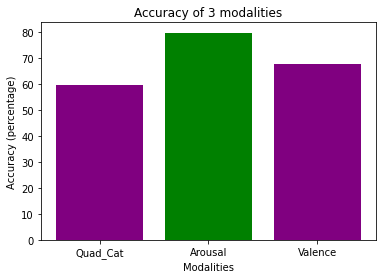

In [12]:
left = [1, 2, 3]
  
height = [all_quad_accuracy_mean, all_ar_accuracy_mean, all_va_accuracy_mean]
  
tick_label = ['Quad_Cat', 'Arousal', 'Valence']
  
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['purple', 'green'])
  
plt.xlabel('Modalities')
plt.ylabel('Accuracy (percentage)')
plt.title('Accuracy of 3 modalities')
  
plt.show()

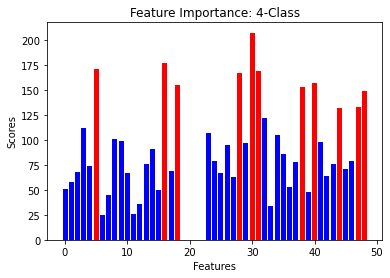

In [13]:
import matplotlib.pyplot as plt

#Feature Importance graph plot for 4-class

xaxis = [x for x in range(len(all_ar_feature))]
clrs = ['blue' if (x < 125) else 'red' for x in all_quad_feature ]
plt.bar(xaxis, all_quad_feature, color = clrs)
plt.title('Feature Importance: 4-Class')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

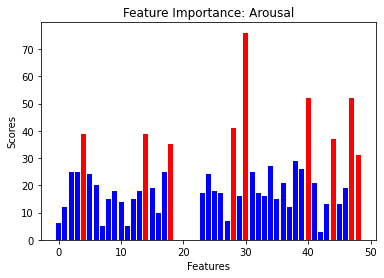

In [14]:
#Feature Importance graph plot for Arousal

xaxis = [x for x in range(len(all_ar_feature))]
clrs = ['blue' if (x < 30) else 'red' for x in all_ar_feature ]
plt.bar(xaxis, all_ar_feature, color = clrs)
plt.title('Feature Importance: Arousal')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

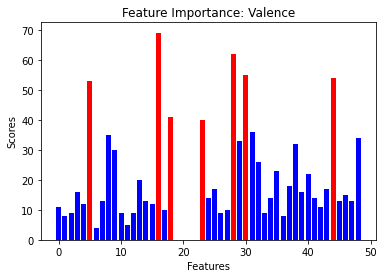

In [15]:
#Feature Importance graph plot for Valence

xaxis = [x for x in range(len(all_va_feature))]
clrs = ['blue' if (x < 40) else 'red' for x in all_va_feature ]
plt.bar(xaxis, all_va_feature, color = clrs)
plt.title('Feature Importance: Valence')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

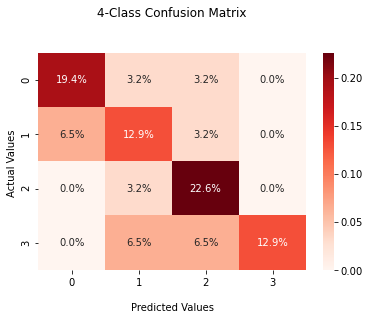

In [16]:
import seaborn as sns

#Confusion Matrix for 4-Class
ax = sns.heatmap(all_quad_cm/np.sum(all_quad_cm), annot=True, fmt='.1%', cmap='Reds')

ax.set_title('4-Class Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.yaxis.set_ticklabels(['0','1','2','3'])

# Display the visualization of the Confusion Matrix.
plt.show()

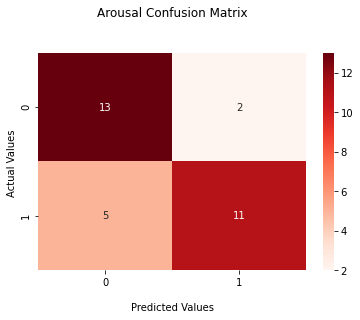

In [17]:
#Confusion Matrix for Arousal

ax = sns.heatmap(all_ar_cm, annot=True, cmap='Reds')

ax.set_title('Arousal Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()

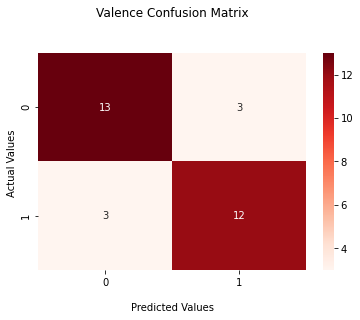

In [18]:
#Confusion Matrix for Valence

ax = sns.heatmap(all_va_cm, annot=True, cmap='Reds')

ax.set_title('Valence Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()